In [23]:
# Load in libraries

import warnings
warnings.filterwarnings('ignore')
import os

#libraries for handling data
import pandas as pd
import numpy as np
import math
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
from sklearn.preprocessing import RobustScaler
rscaler = RobustScaler()
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

#libraries for data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#libaries for modelling
# Regression Modelling Algorithms
import statsmodels.api as sm
#from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor

In [3]:
data_folder = 'C:/Users/reejung/Documents/GitHub/Kaggle - careerVillage'

In [4]:
for file in os.listdir(data_folder):
    print(file)

# print(os.listdir('C:/Users/reejung/Documents/GitHub/Kaggle - careerVillage'))

.ipynb_checkpoints
answers.csv
answers.csv.zip
comments.csv
comments.csv.zip
emails.csv
emails.csv.zip
groups.csv
group_memberships.csv
matches.csv
matches.csv.zip
professionals.csv
professionals.csv.zip
questions.csv
questions.csv.zip
school_memberships.csv
students.csv
students.csv.zip
tags.csv
tag_questions.csv
tag_questions.csv.zip
tag_users.csv
tag_users.csv.zip


In [16]:
groups = pd.read_csv('C:/Users/reejung/Documents/GitHub/Kaggle - careerVillage/groups.csv')
group_memberships = pd.read_csv('C:/Users/reejung/Documents/GitHub/Kaggle - careerVillage/group_memberships.csv')
school_memberships = pd.read_csv('C:/Users/reejung/Documents/GitHub/Kaggle - careerVillage/school_memberships.csv')
tags = pd.read_csv('C:/Users/reejung/Documents/GitHub/Kaggle - careerVillage/tags.csv')
answers = pd.read_csv('C:/Users/reejung/Documents/GitHub/Kaggle - careerVillage/answers.csv/answers.csv')
emails = pd.read_csv('C:/Users/reejung/Documents/GitHub/Kaggle - careerVillage/emails.csv/emails.csv')
comments = pd.read_csv('C:/Users/reejung/Documents/GitHub/Kaggle - careerVillage/comments.csv/comments.csv')
questions = pd.read_csv('C:/Users/reejung/Documents/GitHub/Kaggle - careerVillage/questions.csv')
matches = pd.read_csv('C:/Users/reejung/Documents/GitHub/Kaggle - careerVillage/matches.csv')
professionals = pd.read_csv('C:/Users/reejung/Documents/GitHub/Kaggle - careerVillage/professionals.csv')
students = pd.read_csv('C:/Users/reejung/Documents/GitHub/Kaggle - careerVillage/students.csv/students.csv')
tag_questions = pd.read_csv('C:/Users/reejung/Documents/GitHub/Kaggle - careerVillage/tag_questions.csv')
tag_users =pd.read_csv('C:/Users/reejung/Documents/GitHub/Kaggle - careerVillage/tag_users.csv')

In [9]:
groups.head(3)

,groups_id,groups_group_type
0,eabbdf4029734c848a9da20779637d03,youth program
1,7080bf8dcf78463bb03e6863887fd715,youth program
2,bc6fc50a2b444efc8ec47111b290ffb8,youth program


In [10]:
groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
groups_id            49 non-null object
groups_group_type    49 non-null object
dtypes: object(2)
memory usage: 864.0+ bytes


In [12]:
groups.isnull().sum()

groups_id            0
groups_group_type    0
dtype: int64

In [17]:
answers.head()

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,<p>Hi!</p>\n<p>You are asking a very interesti...
1,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,2018-05-01 14:19:08 UTC+0000,<p>Hi. I joined the Army after I attended coll...
2,eaa66ef919bc408ab5296237440e323f,cbd8f30613a849bf918aed5c010340be,eb80205482e4424cad8f16bc25aa2d9c,2018-05-02 02:41:02 UTC+0000,"<p>Dear Priyanka,</p><p>Greetings! I have answ..."
3,1a6b3749d391486c9e371fbd1e605014,7e72a630c303442ba92ff00e8ea451df,4ec31632938a40b98909416bdd0decff,2017-05-10 19:00:47 UTC+0000,<p>I work for a global company who values high...
4,5229c514000446d582050f89ebd4e184,17802d94699140b0a0d2995f30c034c6,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-10-13 22:07:33 UTC+0000,I agree with Denise. Every single job I've had...


In [18]:
students.head(3)

,students_id,students_location,students_date_joined
0,12a89e96755a4dba83ff03e03043d9c0,NaN,2011-12-16 14:19:24 UTC+0000
1,e37a5990fe354c60be5e87376b08d5e3,NaN,2011-12-27 03:02:44 UTC+0000
2,12b402cceeda43dcb6e12ef9f2d221ea,NaN,2012-01-01 05:00:00 UTC+0000


In [19]:
students.isnull().sum()

students_id                0
students_location       2033
students_date_joined       0
dtype: int64

In [20]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30971 entries, 0 to 30970
Data columns (total 3 columns):
students_id             30971 non-null object
students_location       28938 non-null object
students_date_joined    30971 non-null object
dtypes: object(3)
memory usage: 726.0+ KB


In [43]:
students.students_location.nunique()

5480

In [30]:
students_locations_top = students.students_location.value_counts().sort_values(ascending = False).head(10)

In [33]:
students_locations

New York, New York             1313
Bengaluru, Karnataka, India     890
Los Angeles, California         663
Hyderabad, Telangana, India     597
Boston, Massachusetts           557
San Francisco, California       550
San Jose, California            548
Houston, Texas                  476
Chennai, Tamil Nadu, India      437
Chicago, Illinois               344
Name: students_location, dtype: int64

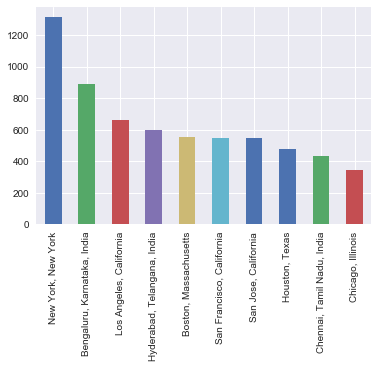

In [36]:
students_locations.plot.bar()

In [61]:
groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
groups_id            49 non-null object
groups_group_type    49 non-null object
dtypes: object(2)
memory usage: 864.0+ bytes


In [37]:
groups.groups_group_type.unique()

array(['youth program', 'cause', 'professional network', 'club',
       'competition', 'mentorship program', 'interest group'],
      dtype=object)

In [41]:
groups.groups_group_type.nunique()

7

In [51]:
groups.groups_group_type.value_counts()

youth program           33
professional network     8
mentorship program       3
cause                    2
competition              1
club                     1
interest group           1
Name: groups_group_type, dtype: int64

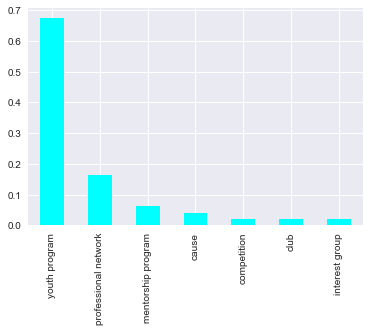

In [59]:
#groups.groups_group_type.value_counts().plot.bar()
groups.groups_group_type.value_counts(normalize=True).plot.bar(color ='cyan')

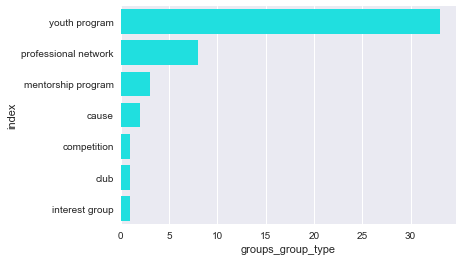

In [76]:
temp = groups['groups_group_type'].value_counts()
temp = temp.reset_index()
sns.barplot(x="groups_group_type", y='index', data=temp, color="cyan")

In [44]:
tags.head()

,tags_tag_id,tags_tag_name
0,27490,college
1,461,computer-science
2,593,computer-software
3,27292,business
4,18217,doctor


In [45]:
tags.tags_tag_name.nunique()

16268